In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config Completer.use_jedi = False

## Read in the unlabelled data points

#### The dataset has been downloaded from [https://www.kaggle.com/harrywang/wine-dataset-for-clustering/version/1](https://www.kaggle.com/harrywang/wine-dataset-for-clustering/version/1)

In [2]:
df = pd.read_csv('data/wine-clustering.csv')

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
X = np.array(df, dtype = np.float64)

In [6]:
X.shape

(178, 13)

## Perform min-max scaling on the data-points

In [7]:
def min_max_scaler(X):
    """Scales the given X feature vector in the range of [0,1].
        For each feature x_j, 
            x_j_new = (x_j - x_j_min)/(x_j_max - x_j_min)"""
    X_min = np.min(X,axis = 0)
    X_max = np.max(X,axis = 0)
    return (X-X_min)/(X_max - X_min)

In [8]:
X = min_max_scaler(X)

## Compute Covariance Matrix

In [9]:
sigma = np.cov(X.T, bias = True)

In [10]:
sigma.shape

(13, 13)

## Compute SVD of the Covariance Matrix

In [11]:
U,S,V = np.linalg.svd(sigma, full_matrices=True, compute_uv= True)

In [12]:
U.shape

(13, 13)

## Choosing number of principal components

In [13]:
k = 1
for r in range(1,len(S)+1):
    explained_var = np.sum(S[:r])/np.sum(S)
    print('Explained Variance with first {} components is {}'.format(r, explained_var))
    if explained_var>= 0.99:
        k = r

Explained Variance with first 1 components is 0.40749484555191334
Explained Variance with first 2 components is 0.5971983633884046
Explained Variance with first 3 components is 0.682815069596822
Explained Variance with first 4 components is 0.757081847630228
Explained Variance with first 5 components is 0.8127348585863358
Explained Variance with first 6 components is 0.8593232304916434
Explained Variance with first 7 components is 0.8959625195457818
Explained Variance with first 8 components is 0.9200504125195332
Explained Variance with first 9 components is 0.9427941177737785
Explained Variance with first 10 components is 0.9653037634193757
Explained Variance with first 11 components is 0.9791166881610431
Explained Variance with first 12 components is 0.9918490473762143
Explained Variance with first 13 components is 1.0


In [14]:
k

13

## Preserve first k principal components

In [15]:
k = 2
U_reduce = U[:,:k]

In [16]:
U_reduce.shape

(13, 2)

## Reduce dimension

In [17]:
Z = np.matmul(X,U_reduce)

In [18]:
Z.shape

(178, 2)

## Visualize given data in reduced dimensions

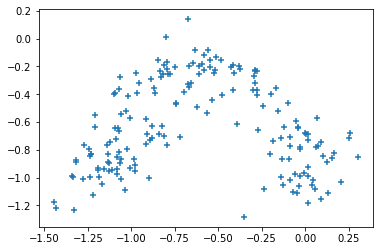

In [19]:
plt.scatter(x = Z[:,0], y = Z[:,1], marker = '+')
plt.show()

## Data Reconstruction/Approximation

In [20]:
X_approx = np.matmul(Z,U_reduce.T)

In [21]:
X_approx.shape

(178, 13)

## Average Squared Projection Error

In [22]:
p_error = np.mean( (np.linalg.norm(X - X_approx, axis =1 ))**4 , axis = 0)

In [23]:
p_error

3.1148255138414984